### Library   

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --no-cache-dir lightgbm

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm
import optuna
from function import function
from optuna.integration import LightGBMPruningCallback
sns.set()
%matplotlib inline

/Users/nipitkodchakorn/.local/share/virtualenvs/Credit-ol4FUWEK/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
import warnings
warnings.filterwarnings('ignore')

### Raw Data Demographic

In [9]:
## DATA UNDERSTANDING
raw_credit = pd.read_csv('credit_record.csv')
print(raw_credit.head())
print(raw_credit.shape,raw_credit.info())

        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
(1048575, 3) None


In [10]:
raw_application = pd.read_csv('application_record.csv')
print(raw_application.head())
print(raw_application.shape)

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

### Data Dict

ID : Client number	

CODE_GENDER	: Gender	

FLAG_OWN_CAR : Is there a car	

FLAG_OWN_REALTY	: Is there a property	

CNT_CHILDREN : Number of children	

AMT_INCOME_TOTAL : Annual income

NAME_INCOME_TYPE : Income category	

NAME_EDUCATION_TYPE	: Education level	

NAME_FAMILY_STATUS	: Marital status	

NAME_HOUSING_TYPE	: Way of living	

DAYS_BIRTH	: Birthday	,Count backwards from current day (0), -1 means yesterday

DAYS_EMPLOYED	: Start date of employment	,Count backwards from current day(0). If positive, it means the person currently unemployed.

FLAG_MOBIL	: Is there a mobile phone	

FLAG_WORK_PHONE	: Is there a work phone	

FLAG_PHONE	: Is there a phone	

FLAG_EMAIL	: Is there an email	

OCCUPATION_TYPE	: Occupation	

CNT_FAM_MEMBERS	: Family size	

MONTHS_BALANCE	: Record month	,The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

STATUS	: Status ,	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

### Adjust Data

In [11]:
raw_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [12]:
df = raw_application.merge(raw_credit, on='ID', how='inner')
df['FLAG_MOBIL'] = df['FLAG_MOBIL'].astype('category')
df['FLAG_WORK_PHONE'] = df['FLAG_WORK_PHONE'].astype('category')
df['FLAG_PHONE'] = df['FLAG_PHONE'].astype('category')
df['FLAG_EMAIL'] = df['FLAG_EMAIL'].astype('category')

In [13]:
df.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
count,7.777150e+05,777715,777715,777715,777715.000000,7.777150e+05,777715,777715,777715,777715,777715.000000,777715.000000,777715.0,777715.0,777715.0,777715.0,537667,777715.000000,777715.000000,777715
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,1.0,2.0,2.0,2.0,18,NaN,NaN,8
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,1.0,0.0,0.0,0.0,Laborers,NaN,NaN,C
freq,NaN,518851,473355,512948,NaN,NaN,400164,524261,546619,697151,NaN,NaN,777715.0,597427.0,543650.0,706418.0,131572,NaN,NaN,329536
mean,5.078743e+06,NaN,NaN,NaN,0.428082,1.885348e+05,NaN,NaN,NaN,NaN,-16124.937046,57775.825016,NaN,NaN,NaN,NaN,NaN,2.208837,-19.373564,NaN
std,4.180442e+04,NaN,NaN,NaN,0.745755,1.016225e+05,NaN,NaN,NaN,NaN,4104.304018,136471.735391,NaN,NaN,NaN,NaN,NaN,0.907380,14.082208,NaN
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,-25152.000000,-15713.000000,NaN,NaN,NaN,NaN,NaN,1.000000,-60.000000,NaN
25%,5.044568e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19453.000000,-3292.000000,NaN,NaN,NaN,NaN,NaN,2.000000,-29.000000,NaN
50%,5.069530e+06,NaN,NaN,NaN,0.000000,1.620000e+05,NaN,NaN,NaN,NaN,-15760.000000,-1682.000000,NaN,NaN,NaN,NaN,NaN,2.000000,-17.000000,NaN
75%,5.115551e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12716.000000,-431.000000,NaN,NaN,NaN,NaN,NaN,3.000000,-8.000000,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   777715 non-null  int64   
 1   CODE_GENDER          777715 non-null  object  
 2   FLAG_OWN_CAR         777715 non-null  object  
 3   FLAG_OWN_REALTY      777715 non-null  object  
 4   CNT_CHILDREN         777715 non-null  int64   
 5   AMT_INCOME_TOTAL     777715 non-null  float64 
 6   NAME_INCOME_TYPE     777715 non-null  object  
 7   NAME_EDUCATION_TYPE  777715 non-null  object  
 8   NAME_FAMILY_STATUS   777715 non-null  object  
 9   NAME_HOUSING_TYPE    777715 non-null  object  
 10  DAYS_BIRTH           777715 non-null  int64   
 11  DAYS_EMPLOYED        777715 non-null  int64   
 12  FLAG_MOBIL           777715 non-null  category
 13  FLAG_WORK_PHONE      777715 non-null  category
 14  FLAG_PHONE           777715 non-null  category
 15  

### DATA CLEANING

In [15]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [16]:
print(df['OCCUPATION_TYPE'].nunique())
df['OCCUPATION_TYPE'].fillna('Others',inplace=True)
print(df.isnull().sum())
df.shape

18
ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64


(777715, 20)

In [17]:
df.duplicated().sum()

0

### EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   777715 non-null  int64   
 1   CODE_GENDER          777715 non-null  object  
 2   FLAG_OWN_CAR         777715 non-null  object  
 3   FLAG_OWN_REALTY      777715 non-null  object  
 4   CNT_CHILDREN         777715 non-null  int64   
 5   AMT_INCOME_TOTAL     777715 non-null  float64 
 6   NAME_INCOME_TYPE     777715 non-null  object  
 7   NAME_EDUCATION_TYPE  777715 non-null  object  
 8   NAME_FAMILY_STATUS   777715 non-null  object  
 9   NAME_HOUSING_TYPE    777715 non-null  object  
 10  DAYS_BIRTH           777715 non-null  int64   
 11  DAYS_EMPLOYED        777715 non-null  int64   
 12  FLAG_MOBIL           777715 non-null  category
 13  FLAG_WORK_PHONE      777715 non-null  category
 14  FLAG_PHONE           777715 non-null  category
 15  

In [19]:
df = df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car', 
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Nbchildren',
                               'AMT_INCOME_TOTAL':'Total_income_per_year','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_level','NAME_FAMILY_STATUS':'Marital_status',
                               'NAME_HOUSING_TYPE':'Way_of_living','FLAG_WORK_PHONE':'Workphone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','FLAG_MOBIL':'mobile','OCCUPATION_TYPE':'Occupation',
                               'CNT_FAM_MEMBERS':'Nbfamily_member'})

In [20]:
numeric_cols = df.select_dtypes(include='number')
print(numeric_cols.columns)

Index(['ID', 'Nbchildren', 'Total_income_per_year', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'Nbfamily_member', 'MONTHS_BALANCE'],
      dtype='object')


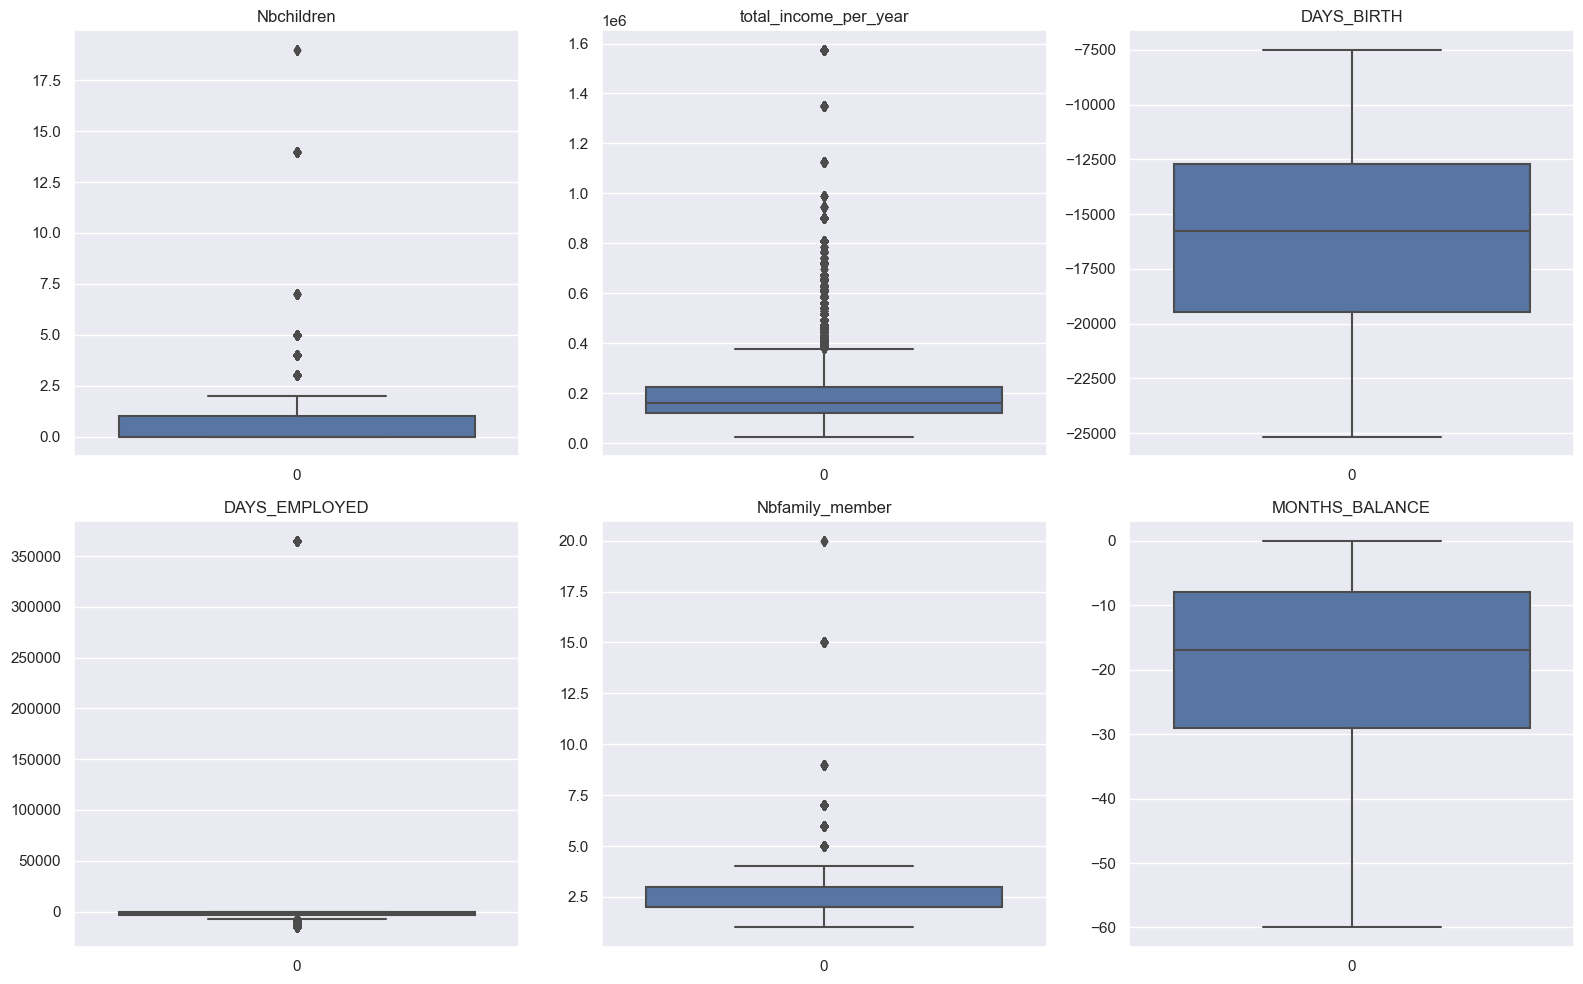

In [21]:
plt.figure(figsize=(16,10))

plt.subplot(2, 3, 1)
sns.boxplot(data=df["Nbchildren"])
plt.title('Nbchildren')

plt.subplot(2, 3, 2)
sns.boxplot(data=df['Total_income_per_year'])
plt.title('total_income_per_year')

plt.subplot(2, 3, 3)
sns.boxplot(data=df['DAYS_BIRTH'])
plt.title('DAYS_BIRTH')

plt.subplot(2, 3, 4)
sns.boxplot(data=df['DAYS_EMPLOYED'])
plt.title('DAYS_EMPLOYED')

plt.subplot(2, 3, 5)
sns.boxplot(data=df['Nbfamily_member'])
plt.title('Nbfamily_member')

plt.subplot(2, 3, 6)
sns.boxplot(data=df['MONTHS_BALANCE'])
plt.title('MONTHS_BALANCE')

plt.tight_layout()
plt.show()

In [22]:
### Deal with the outlier
number_Children_outlier = df['Nbchildren'].quantile(0.999)
df = df[df['Nbchildren'] <= number_Children_outlier]
Total_income_per_year_outlier = df['Total_income_per_year'].quantile(0.999)
df = df[df['Total_income_per_year'] <= Total_income_per_year_outlier]

In [23]:
### Check historical payment status for each customer
grouped=df.groupby('ID')['STATUS'].value_counts()
grouped

ID       STATUS
5008804  C         13
         0          1
         1          1
         X          1
5008805  C         12
                   ..
5150483  X         18
5150484  0         12
         C          1
5150485  0          2
5150487  C         30
Name: STATUS, Length: 74768, dtype: int64

<AxesSubplot:xlabel='STATUS'>

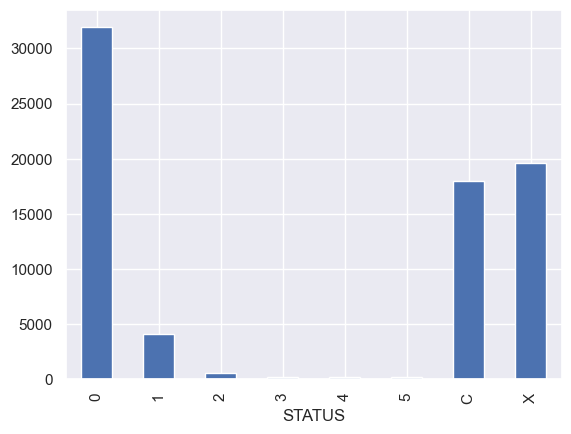

In [24]:
df.groupby('STATUS').count()
number_of_customer_for_each_status=grouped.groupby('STATUS').count()
number_of_customer_for_each_status.plot(kind='bar')
# Most customers pay off their loans in 1-29 days
# High percetage of customers don't borrow loans
# Also High percetage of customers pay off their loan forever
# Few people are late in paying off their loans

### Graph

In [25]:
## DEALING WITH NUMERICAL COLUMNS
def Categorical_countplot(features):
    for categorical_columns in features:
        plt.figure(figsize=(12, 8))
        ax=sns.countplot(y=df[categorical_columns], data=df)
        # plt.legend(loc='best')
        total = len(df[categorical_columns])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

In [26]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
print(categorical_columns.columns)

Index(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'mobile', 'Workphone', 'Phone',
       'Email', 'Occupation', 'STATUS'],
      dtype='object')


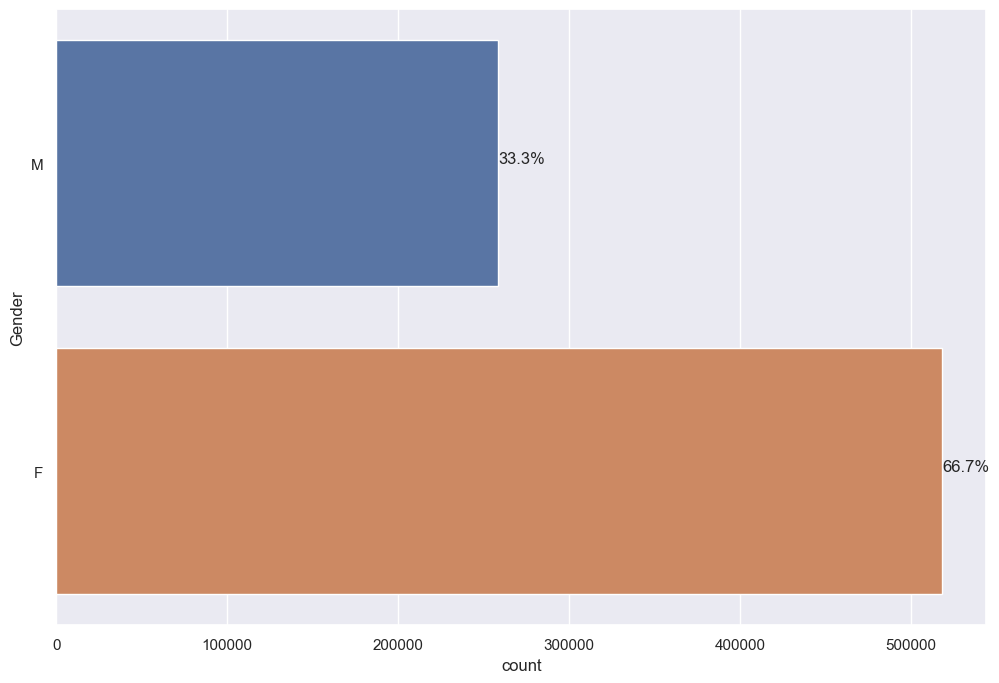

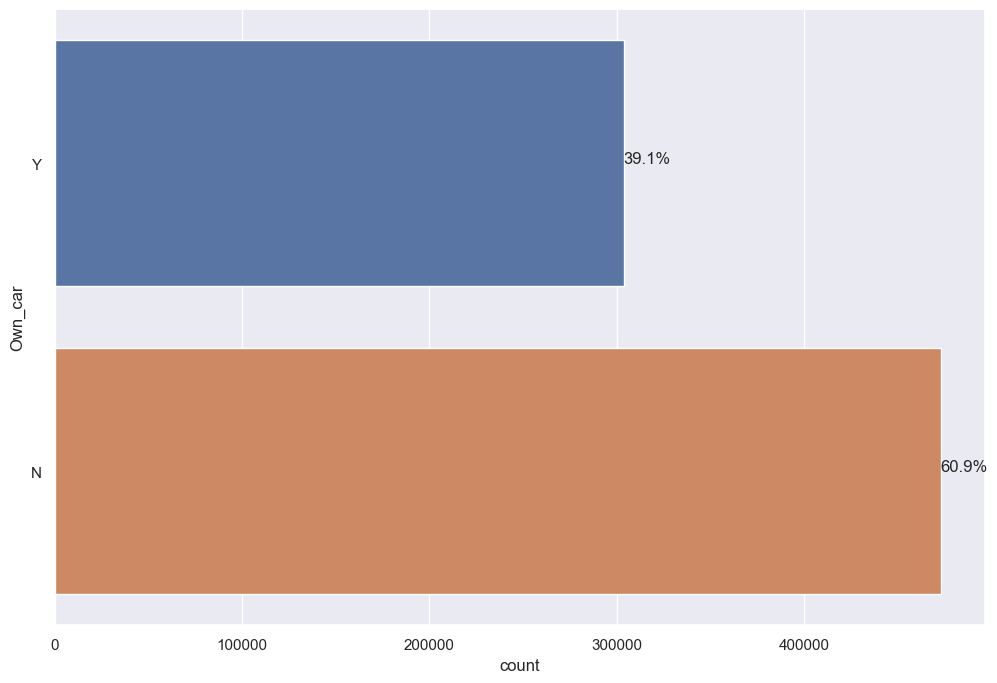

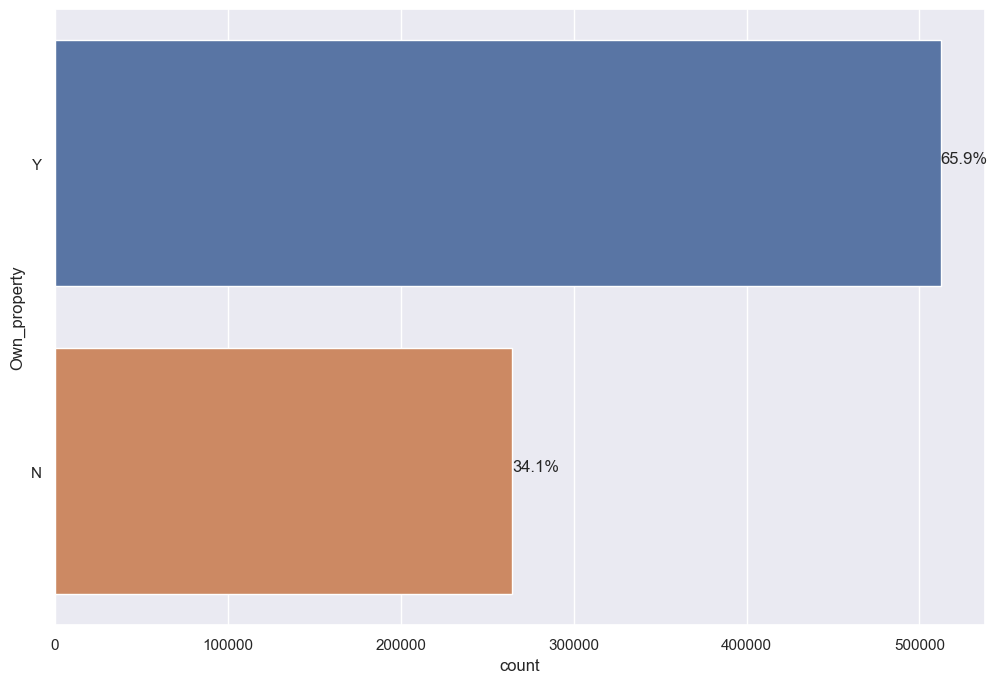

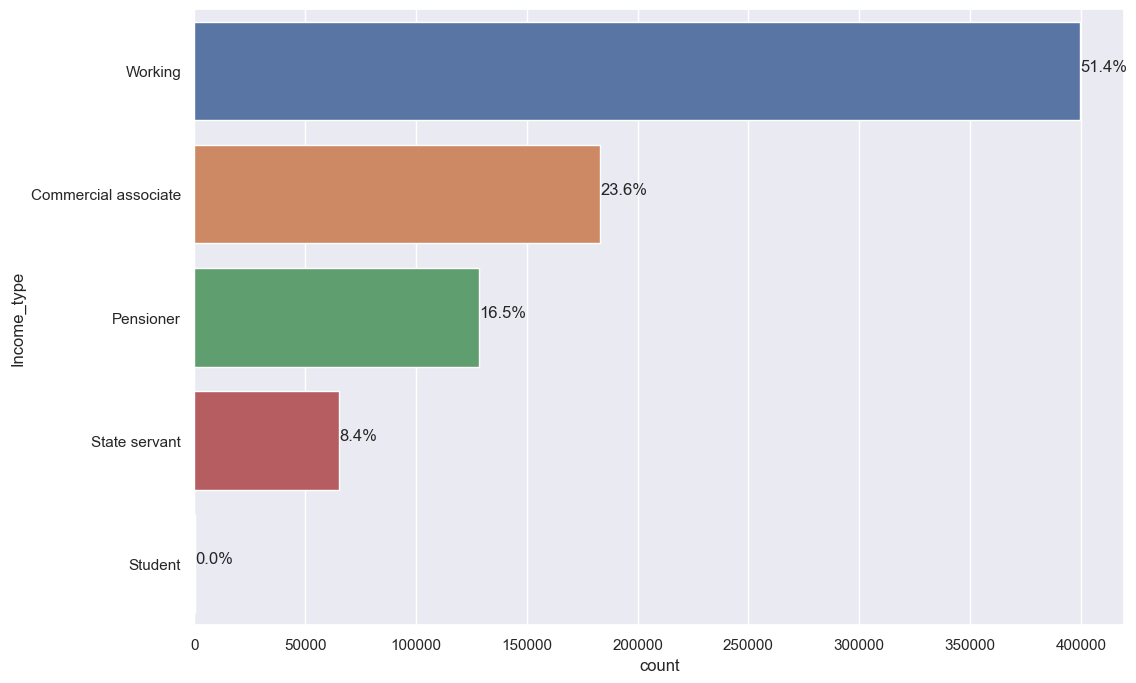

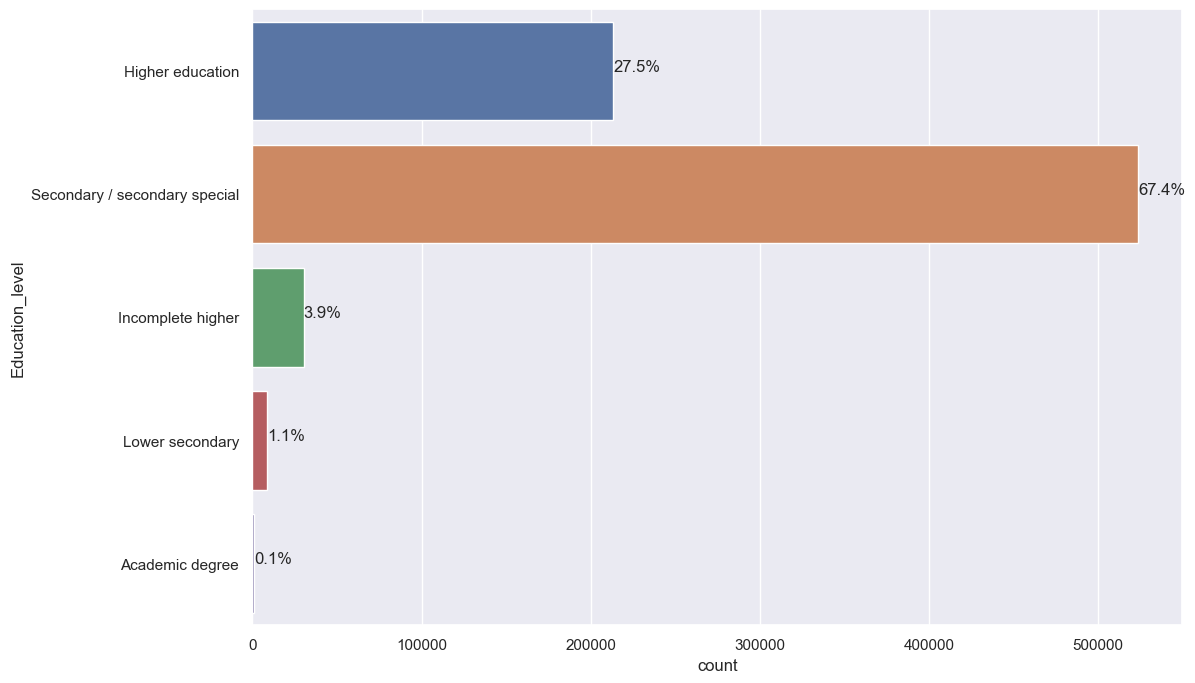

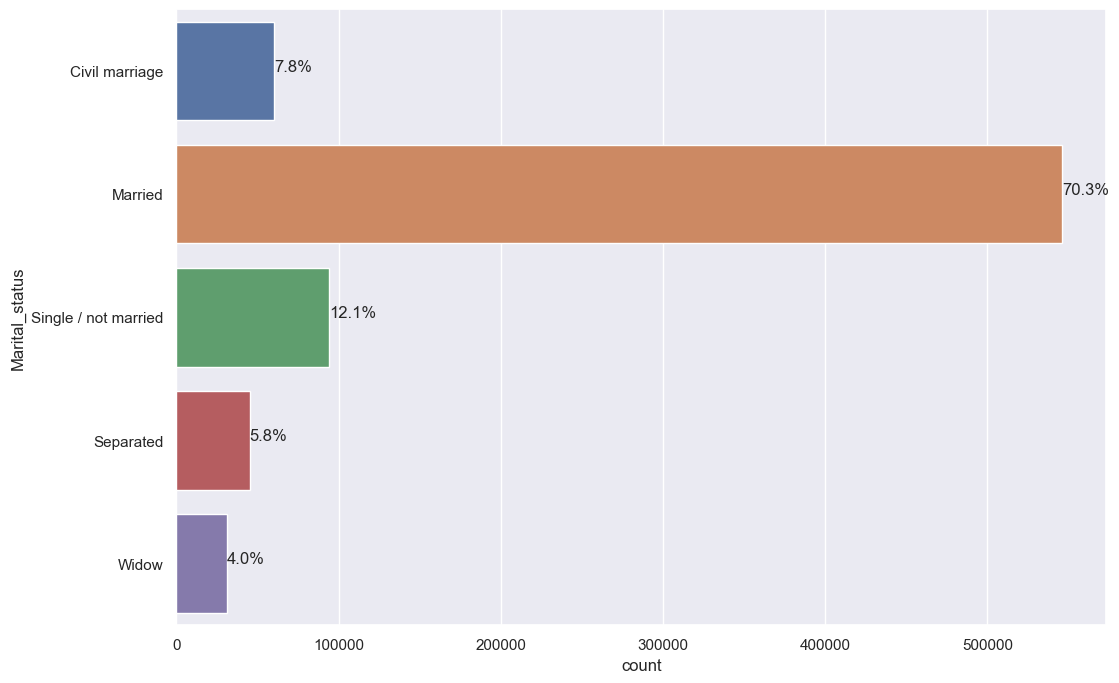

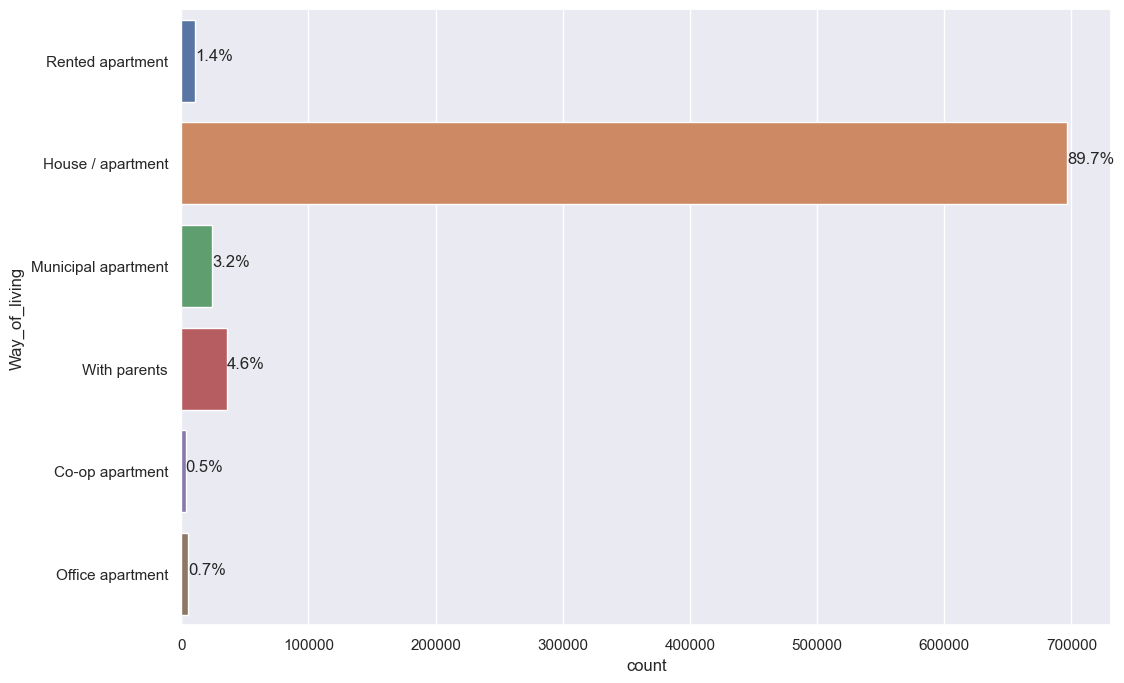

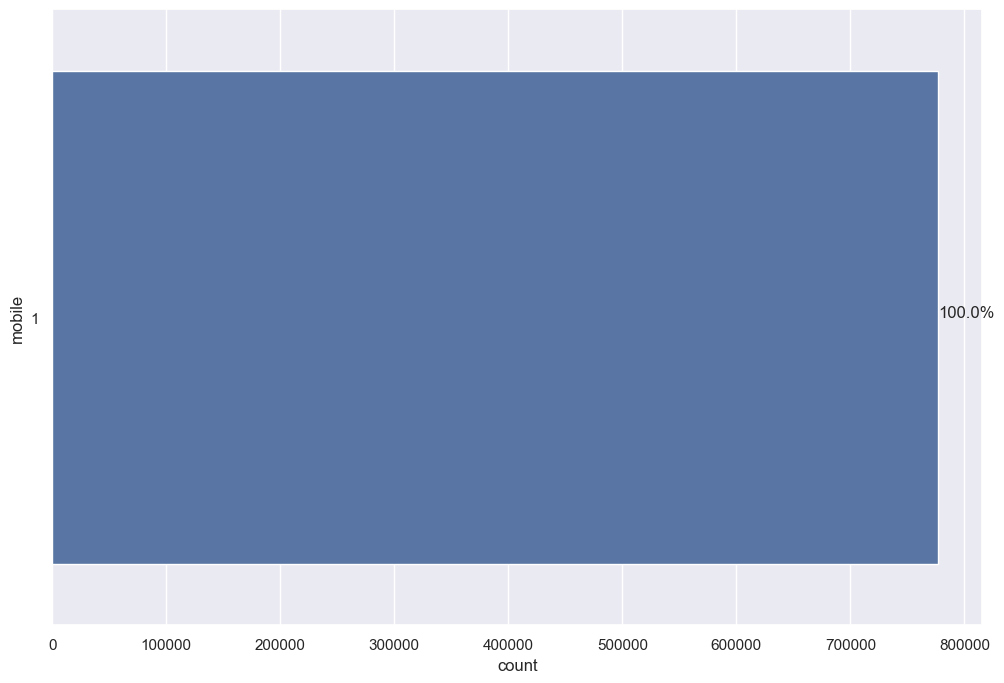

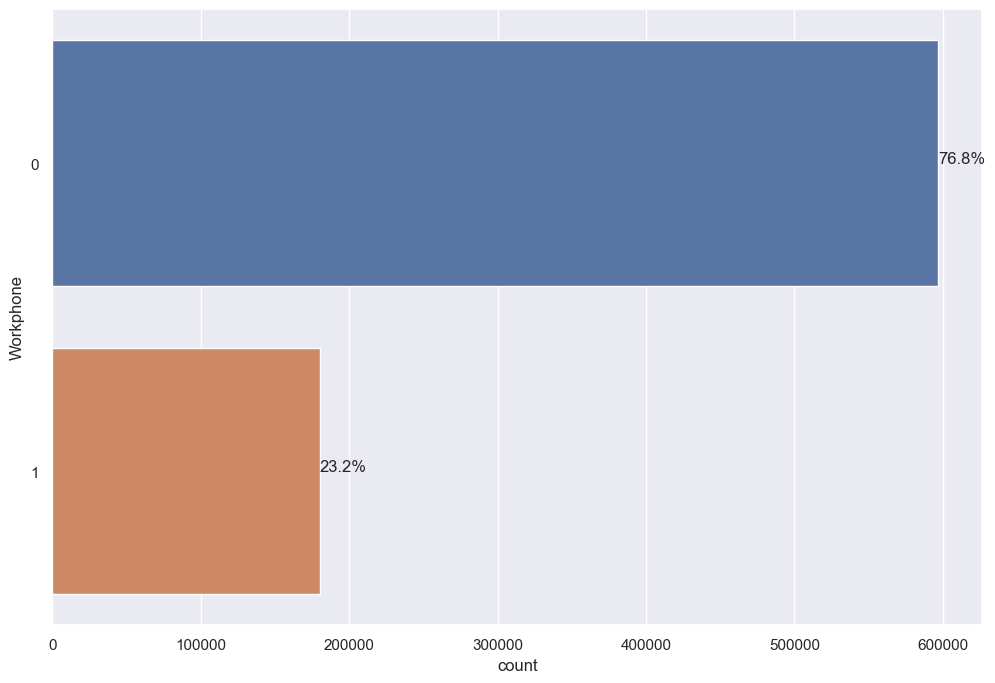

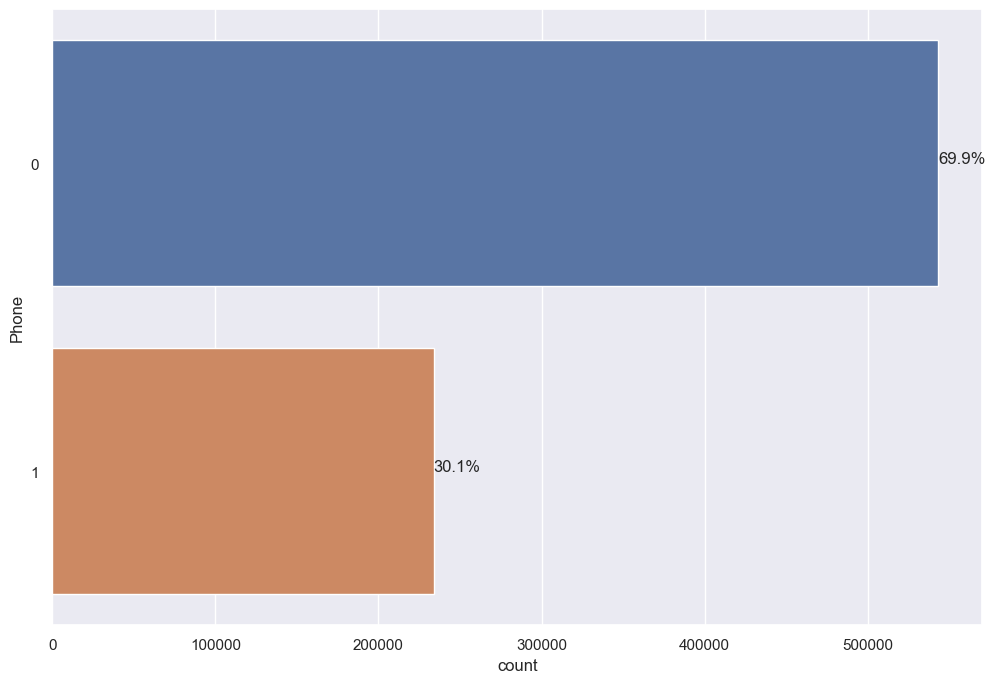

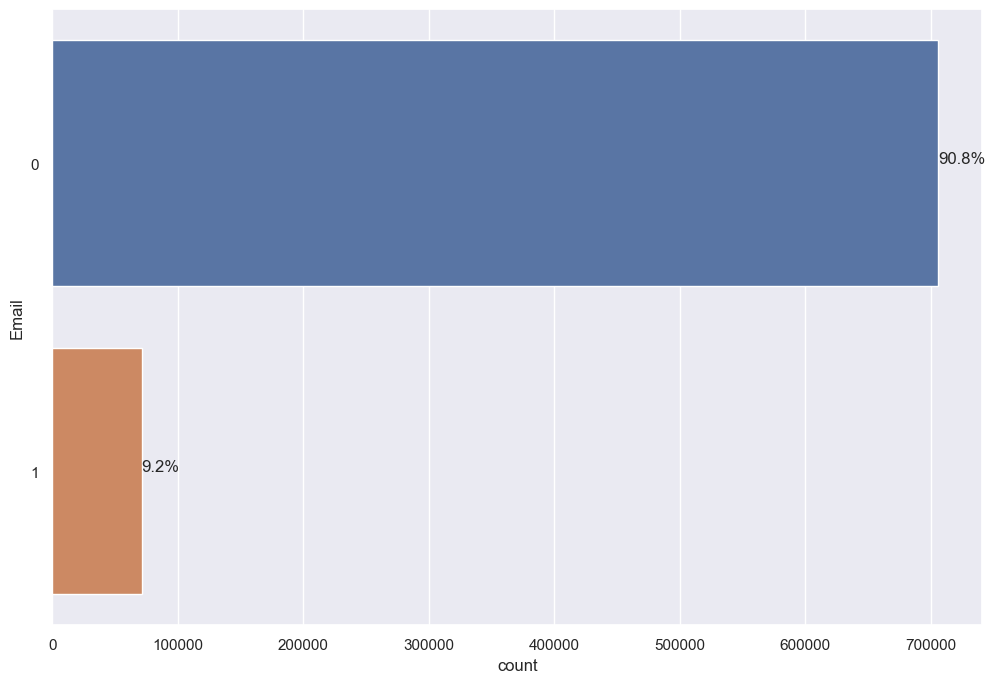

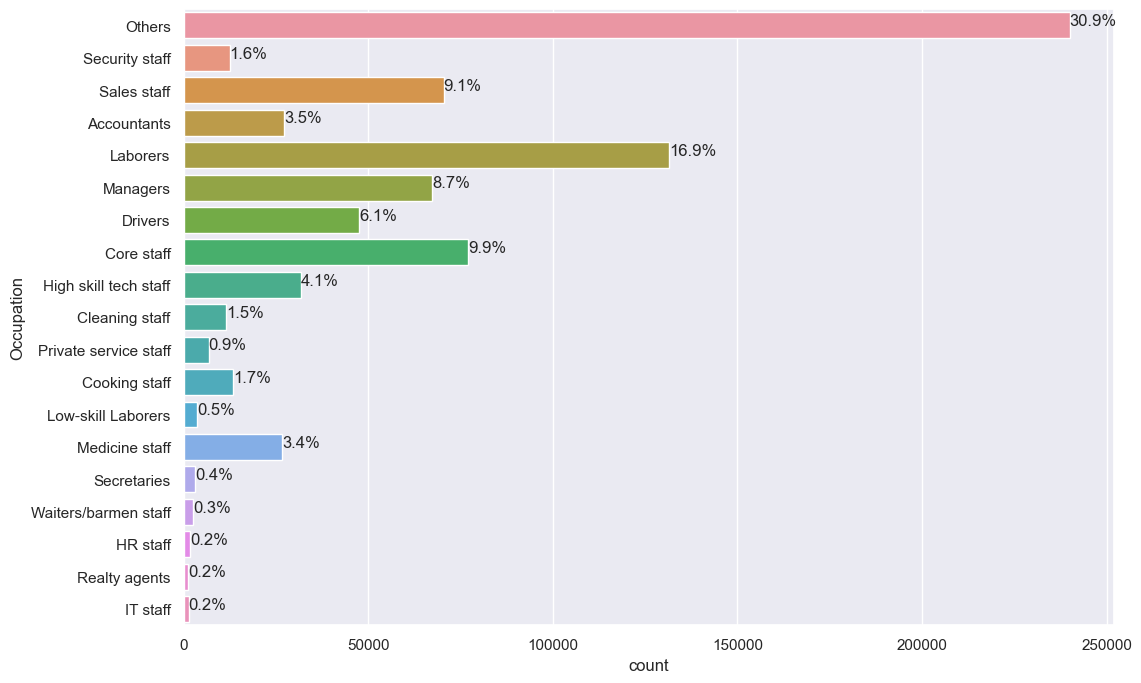

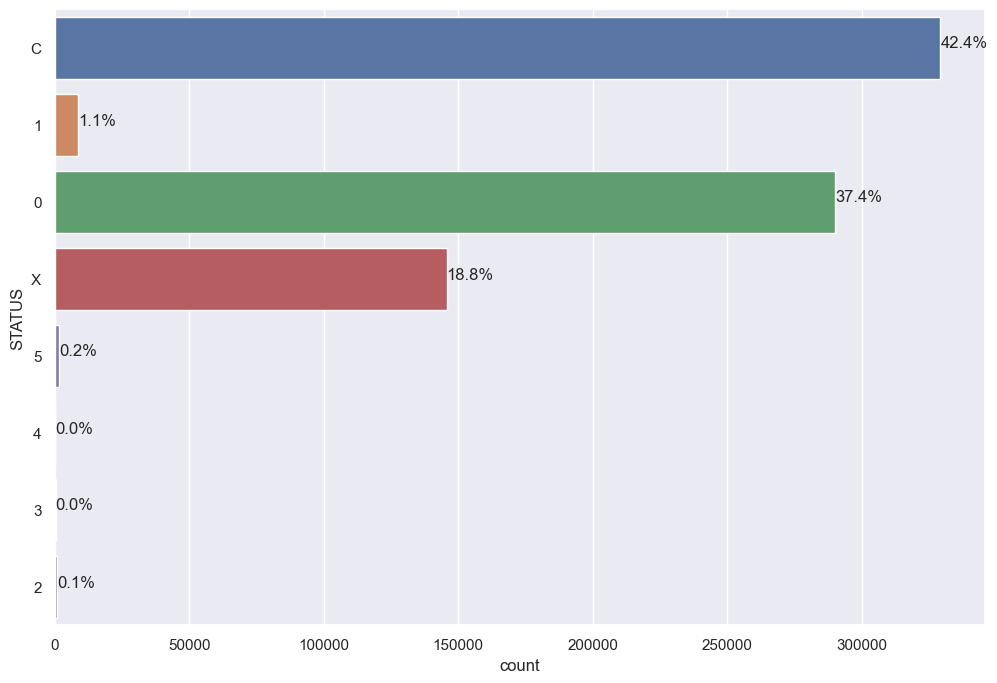

In [27]:
Categorical_countplot(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'mobile', 'Workphone', 'Phone',
       'Email', 'Occupation', 'STATUS'])

### Feature engineering

In [28]:
credit_grouped=pd.get_dummies(data=df,columns=['STATUS'],
                              prefix='',prefix_sep='').groupby('ID')[sorted(df['STATUS'].unique().tolist())].sum()
credit_grouped

,0,1,2,3,4,5,C,X
ID,,,,,,,,
5008804,1,1,0,0,0,0,13,1
5008805,1,1,0,0,0,0,12,1
5008806,7,0,0,0,0,0,7,16
5008808,2,0,0,0,0,0,0,3
5008809,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...
5150482,12,0,0,0,0,0,6,0
5150483,0,0,0,0,0,0,0,18
5150484,12,0,0,0,0,0,1,0


In [29]:
credit_grouped=credit_grouped.rename(columns=
                      {'0':'pastdue_1_29',
                       '1':'pastdue_30_59',
                       '2':'overdue_60_89',
                       '3':'overdue_90_119',
                       '4':'overdue_120_149',
                       '5':'overdue_over_150',
                       'C':'paid_off',
                        'X':'no_loan'})

overall_pastdue=['pastdue_1_29','pastdue_30_59',	'overdue_60_89',	'overdue_90_119'	,'overdue_120_149',	'overdue_over_150']
credit_grouped['Total_months_credit_registered']=df.groupby('ID')['MONTHS_BALANCE'].count()
credit_grouped['Delinquent_accounts']=credit_grouped[['pastdue_30_59','overdue_60_89','overdue_90_119'	,'overdue_120_149'	,'overdue_over_150']].sum(axis=1)
credit_grouped['Ordinary_accounts']=credit_grouped[['pastdue_1_29']].sum(axis=1)
credit_grouped['overall_pastdue']=credit_grouped[overall_pastdue].sum(axis=1)
credit_grouped.head()

,pastdue_1_29,pastdue_30_59,overdue_60_89,overdue_90_119,overdue_120_149,overdue_over_150,paid_off,no_loan,Total_months_credit_registered,Delinquent_accounts,Ordinary_accounts,overall_pastdue
ID,,,,,,,,,,,,
5008804,1,1,0,0,0,0,13,1,16,1,1,2
5008805,1,1,0,0,0,0,12,1,15,1,1,2
5008806,7,0,0,0,0,0,7,16,30,0,7,7
5008808,2,0,0,0,0,0,0,3,5,0,2,2
5008809,0,0,0,0,0,0,0,5,5,0,0,0


In [30]:
target =[]
for index,row in credit_grouped.iterrows() :
  if row ['no_loan']==row['Total_months_credit_registered']:
    target.append(0)
  elif row['overall_pastdue'] == row['Ordinary_accounts']:
    target.append(0)
  elif row['paid_off'] >= 12 & row['Delinquent_accounts'] <= 2: 
    target.append(0)
  elif row['no_loan'] >= 12 & row['Delinquent_accounts'] <=2:
    target.append(0)
  elif row['Delinquent_accounts'] <= 0:
    target.append(0)
  else: 
    target.append(1)

credit_grouped['good_or_bad']=target
credit_grouped['good_or_bad'].value_counts()

0    35622
1      784
Name: good_or_bad, dtype: int64

In [31]:
from function import assess_risk

In [32]:
df = function.select_first_month(df)

In [33]:
df['STATUS'].replace({'C':0}, inplace=True)
df['STATUS'] = df['STATUS'].astype('int')

In [34]:
df['STATUS']  = df['STATUS'].apply(assess_risk.risk_assess)

In [35]:
features=['no_loan','Total_months_credit_registered',	'Delinquent_accounts',	'Ordinary_accounts',	'overall_pastdue','good_or_bad']
columns_credit= credit_grouped.loc[:,features]
df = pd.merge(df,columns_credit,on='ID')

In [36]:
risk=[]
for index,row in df.iterrows() :
  if row['STATUS'] == 0  and row['good_or_bad'] == 0 :
    risk.append(0)
  else:
    risk.append(1)

df['Risk']=risk
df['Risk'].value_counts(normalize = True )

0    0.972237
1    0.027763
Name: Risk, dtype: float64

In [37]:
from function import convert_day

In [38]:
df['Age'] = df['DAYS_BIRTH'].apply(convert_day.convert_day_to_year)
df['Age'] = df['Age'].astype(int)
df['Experience'] = df['DAYS_EMPLOYED'].apply(convert_day.convert_day_to_year)
df['Total_income_lifetime_employed'] = df['Experience'] * df['Total_income_per_year']
df.drop('DAYS_BIRTH',axis=1,inplace=True)
df.drop('DAYS_EMPLOYED',axis=1,inplace=True)

In [39]:
def employment_status(date):
    # Determine the employment status based on the duration
    if date < 0:
        return "Unemployed"
    else:
        return "Employment"

In [40]:
df['Employment_status'] = df['Experience'].apply(employment_status)

### DATA VISUALIZING

In [41]:
df.head()

,ID,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,...,Total_months_credit_registered,Delinquent_accounts,Ordinary_accounts,overall_pastdue,good_or_bad,Risk,Age,Experience,Total_income_lifetime_employed,Employment_status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,16,1,1,2,0,0,33,12.0,5130000.0,Employment
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,15,1,1,2,0,0,33,12.0,5130000.0,Employment
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,30,0,7,7,0,0,59,3.0,337500.0,Employment
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,5,0,2,2,0,0,52,8.0,2160000.0,Employment
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,27,0,6,6,0,0,52,8.0,2160000.0,Employment


In [42]:
df.set_index('ID',inplace=True)

In [43]:
### drop unnecessary columns
df.drop(columns=['MONTHS_BALANCE','mobile','STATUS','good_or_bad','no_loan','Delinquent_accounts','Ordinary_accounts','overall_pastdue'],axis=1,inplace=True)

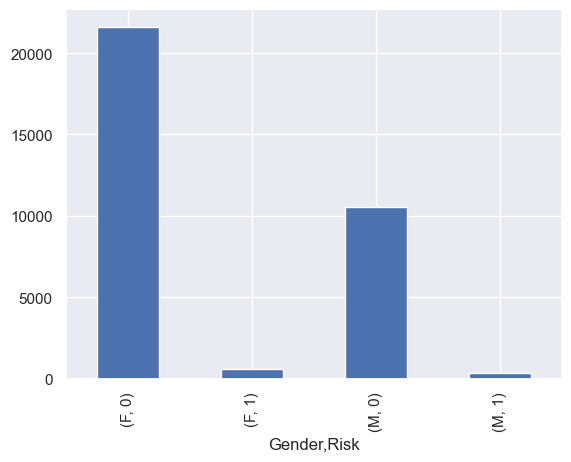

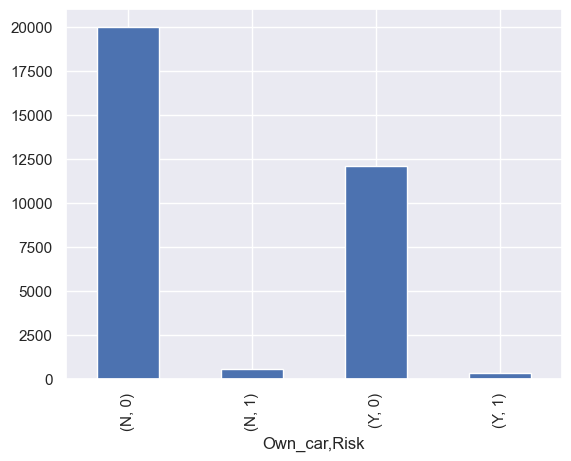

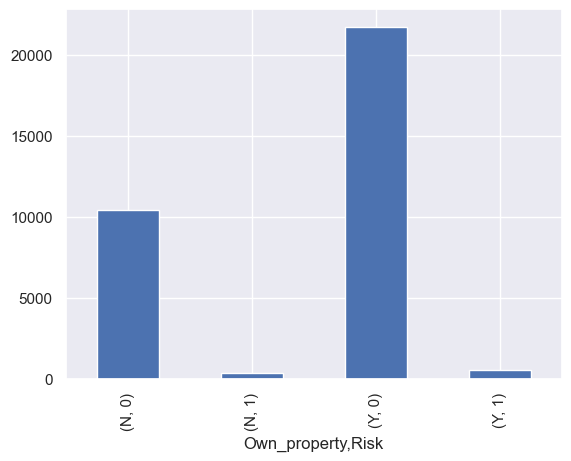

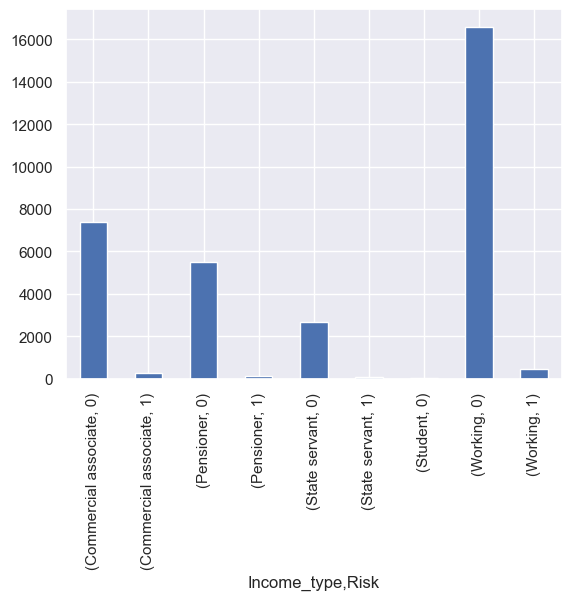

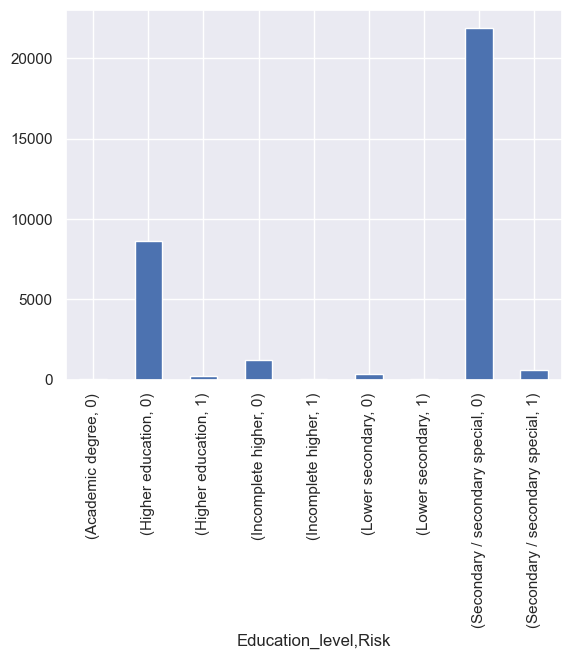

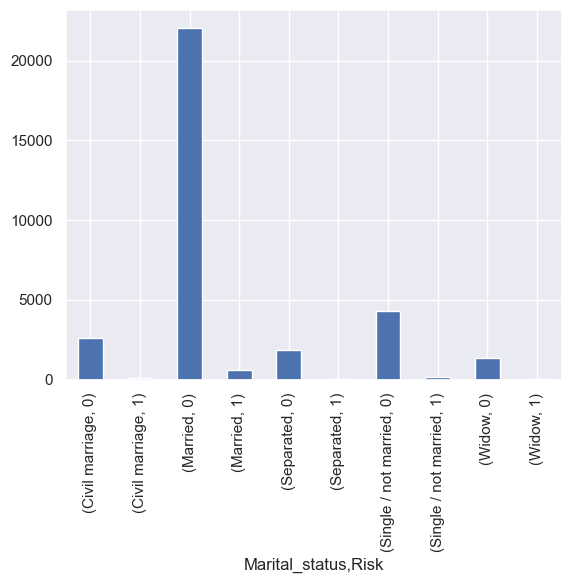

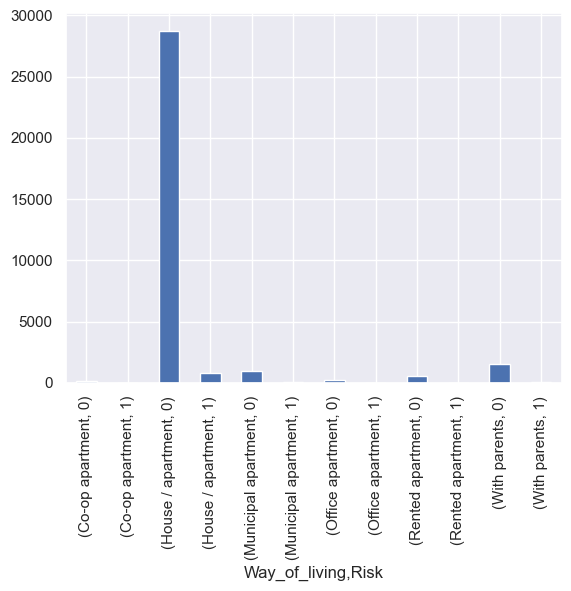

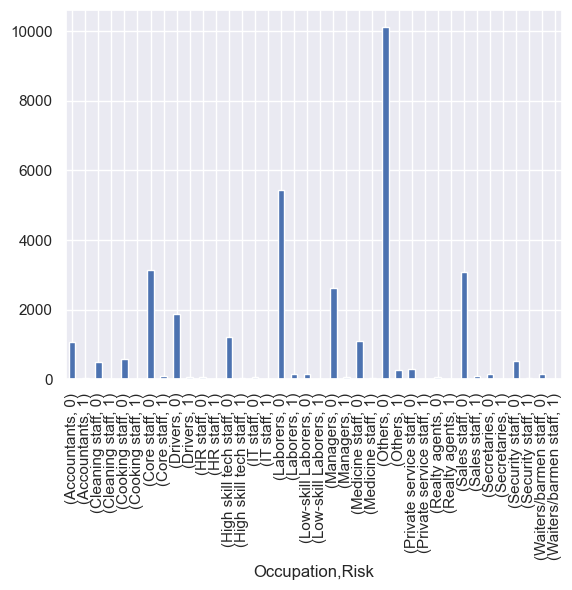

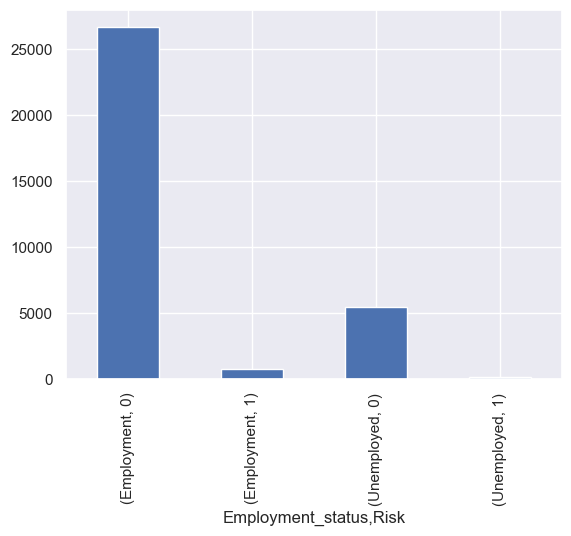

In [44]:
column = ['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'Employment_status']
for variable in column:
    df.groupby(variable)['Risk'].value_counts().plot(kind='bar')
    plt.show()

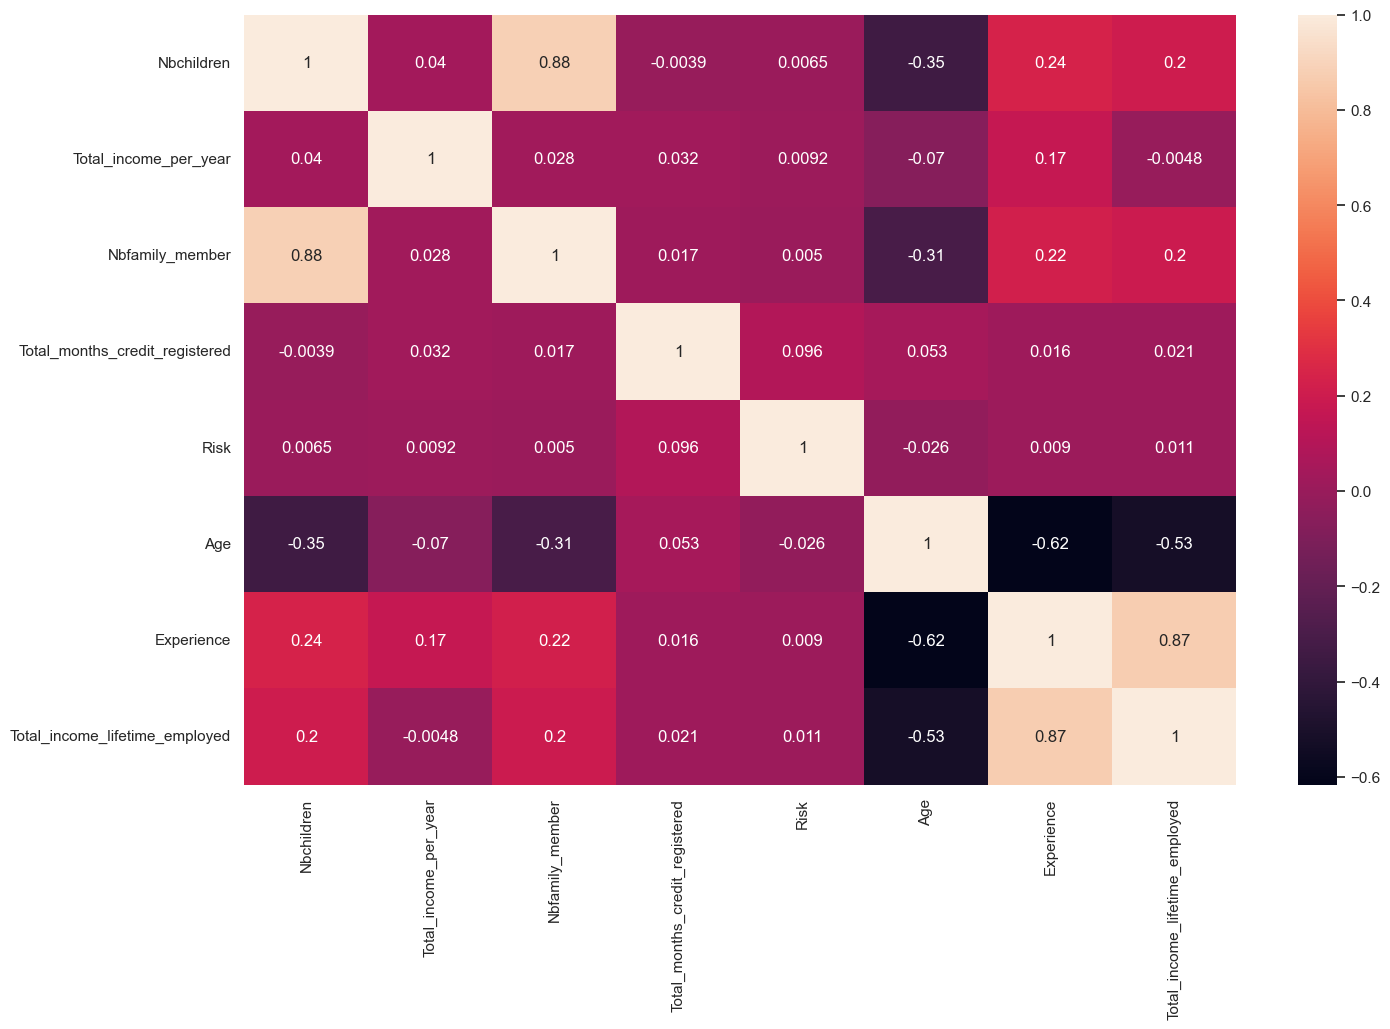

In [45]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot= True)
plt.show()

### DATA PREPROCESSING

In [46]:
X = df.drop(['Risk'],axis=1)
y = df['Risk']

In [47]:
# X['Rand'] = np.random.randint(1,10,len(X))

In [48]:
X.select_dtypes(include=['object', 'category']).columns


Index(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Employment_status'],
      dtype='object')

In [49]:
X.select_dtypes(include=['number']).columns


Index(['Nbchildren', 'Total_income_per_year', 'Nbfamily_member',
       'Total_months_credit_registered', 'Age', 'Experience',
       'Total_income_lifetime_employed'],
      dtype='object')

In [50]:
X =  X[['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Employment_status','Nbchildren', 'Total_income_per_year', 'Nbfamily_member', 'Age', 'Experience','Total_months_credit_registered',
       'Total_income_lifetime_employed']]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify=y,random_state=365)

### In case use SMOTENC

In [52]:
# from imblearn.over_sampling import SMOTENC
# oversample = SMOTENC(categorical_features = range(0,12),random_state=43)
# X_train_balanced,y_train_balanced = oversample.fit_resample(X_train, y_train)

In [53]:
# from sklearn.feature_extraction import DictVectorizer
# encoded = DictVectorizer(sparse=False)
# X_train_dict = encoded.fit_transform(X_train_balanced.to_dict('records'))
# X_test_dict  = encoded.transform(X_test.to_dict('records'))
# print(X_train_dict.shape)
# print(X_train_dict)

### SCALING, OVERSAMPLING, ENCODING

In [54]:
from sklearn.feature_extraction import DictVectorizer
encoded = DictVectorizer(sparse=False)
X_train_dict = encoded.fit_transform(X_train.to_dict('records'))
X_test_dict  = encoded.transform(X_test.to_dict('records'))

In [55]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=365)
X_train_balanced,y_train_balanced = oversample.fit_resample(X_train_dict,y_train)

In [56]:
# data standarization 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_dict)

### Modeling

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score

### Write in function

decision_model = DecisionTreeClassifier(random_state=420)

decision_model.fit(X_train_scaled, y_train_balanced)

print('Decision Tree Model Accuracy : ', decision_model.score(X_test_scaled, y_test)*100, '%')

prediction = decision_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test, prediction))

Decision Tree Model Accuracy :  95.5364703036168 %

Confusion matrix :
[[7822  215]
 [ 154   76]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8037
           1       0.26      0.33      0.29       230

    accuracy                           0.96      8267
   macro avg       0.62      0.65      0.63      8267
weighted avg       0.96      0.96      0.96      8267

\ROC_AUC_SCORE report:
0.6518417536285981


In [58]:
from sklearn.svm import SVC

svc_model = SVC(random_state=420)

svc_model.fit(X_train_scaled, y_train_balanced)

print('Support Vector Classifier Accuracy : ', svc_model.score(X_test_scaled, y_test)*100, '%')

prediction = svc_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

Support Vector Classifier Accuracy :  95.16148542397484 %

Confusion matrix :
[[7808  229]
 [ 171   59]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8037
           1       0.20      0.26      0.23       230

    accuracy                           0.95      8267
   macro avg       0.59      0.61      0.60      8267
weighted avg       0.96      0.95      0.95      8267

\ROC_AUC_SCORE report:
0.6140142601338376


In [59]:
from sklearn.ensemble import RandomForestClassifier

Random_model  = RandomForestClassifier(random_state=420)

Random_model.fit(X_train_scaled, y_train_balanced)

print('Random forest Model Accuracy : ', Random_model.score(X_test_scaled, y_test)*100, '%')

prediction = Random_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

Random forest Model Accuracy :  96.98802467642433 %

Confusion matrix :
[[7954   83]
 [ 166   64]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8037
           1       0.44      0.28      0.34       230

    accuracy                           0.97      8267
   macro avg       0.71      0.63      0.66      8267
weighted avg       0.96      0.97      0.97      8267

\ROC_AUC_SCORE report:
0.6339668165170868


In [60]:
from lightgbm import LGBMClassifier
LGBM_model  = LGBMClassifier()

LGBM_model.fit(X_train_scaled, y_train_balanced)

print('Light GBM Model Accuracy : ', LGBM_model.score(X_test_scaled, y_test)*100, '%')

prediction = LGBM_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

Light GBM Model Accuracy :  97.0001209628644 %

Confusion matrix :
[[7975   62]
 [ 186   44]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8037
           1       0.42      0.19      0.26       230

    accuracy                           0.97      8267
   macro avg       0.70      0.59      0.62      8267
weighted avg       0.96      0.97      0.96      8267

\ROC_AUC_SCORE report:
0.5917950132809668


In [61]:
y_train_balanced = y_train_balanced.astype('int')
y_test = y_test.astype('int')
from xgboost import XGBClassifier
XGB_model  =XGBClassifier(use_label_encoder=False,objective='binary:logistic',eval_metric= 'error')

XGB_model.fit(X_train_scaled, y_train_balanced)

print('Xg Boost Model Accuracy : ', XGB_model.score(X_test_scaled, y_test)*100, '%')

prediction = XGB_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

Xg Boost Model Accuracy :  97.31462441030604 %

Confusion matrix :
[[7997   40]
 [ 182   48]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8037
           1       0.55      0.21      0.30       230

    accuracy                           0.97      8267
   macro avg       0.76      0.60      0.64      8267
weighted avg       0.97      0.97      0.97      8267

\ROC_AUC_SCORE report:
0.6018593353565844


### Hyperparameter tuning

#### LGBM Hyper parameter tuning

In [63]:
def LGBM_Optuna(trial,X_train_scaled = X_train_scaled,X_test_scaled = X_test_scaled,y_train_balanced = y_train_balanced,y_test = y_test):
    param_grid = {
        "n_estimators": trial.suggest_categorical("n_estimators", [100,200,1000,3000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "num_leaves": trial.suggest_int("num_leaves",20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3,12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100,200,1000),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }
    
    model = LGBMClassifier(objective ="binary",**param_grid)
    model.fit(
            X_train_scaled,
            y_train_balanced,
            eval_set=[(X_test_scaled, y_test)],
            eval_metric="binary_logloss",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "binary_logloss")
            ],
        )
    y_preds = model.predict_proba(X_test_scaled)[:, 1]
    score = roc_auc_score(y_test, y_preds)

    return score


In [64]:
study = optuna.create_study(directions= 'minimize', study_name="LGBM Classifier")
study.optimize(LGBM_Optuna, n_trials=200)

ValueError: Please set either 'minimize' or 'maximize' to direction. You can also set the corresponding `StudyDirection` member.

In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 0.6368515723474583
  Params: 
    n_estimators: 100
    learning_rate: 0.08499547066469826
    num_leaves: 2740
    max_depth: 4
    min_data_in_leaf: 100
    lambda_l1: 35
    lambda_l2: 100
    min_gain_to_split: 8.917931031470733
    bagging_fraction: 0.2
    bagging_freq: 1
    feature_fraction: 0.5


In [ ]:
best_lgbm_model = LGBMClassifier( n_estimators= 100,
    learning_rate= 0.08558229734842161,
    num_leaves= 420,
    max_depth= 3,
    min_data_in_leaf= 100,
    lambda_l1= 95,
    lambda_l2= 70,
    min_gain_to_split= 14.256993914200514,
    bagging_fraction= 0.6000000000000001,
    bagging_freq= 1,
    feature_fraction= 0.2)

In [ ]:
best_lgbm_model.fit(X_train_scaled, y_train_balanced)

print('Light GBM Model Accuracy : ', best_lgbm_model.score(X_test_scaled, y_test)*100, '%')

prediction = best_lgbm_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=14.256993914200514, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.256993914200514
[LightGBM] [Warning] lambda_l1 is set=95, reg_alpha=0.0 will be ignored. Current value: lambda_l1=95
Light GBM Model Accuracy :  97.21785411878552 %

Confusion matrix :
[[8037    0]
 [ 230    0]]

Classification report:
              precisi

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [ ]:
test = X.iloc[9,:].to_dict()

In [ ]:
test = {'Gender': 'M',
 'Own_car': 'Y',
 'Own_property': 'Y',
 'Income_type': 'Working',
 'Education_level': 'Higher education',
 'Marital_status': 'Married',
 'Way_of_living': 'House / apartment',
 'Occupation': 'Accountants',
 'Employment_status': 'Employment',
 'Nbchildren': 0,
 'Total_income_per_year': 270000.0,
 'Workphone': 1,
 'Phone': 1,
 'Email': 1,
 'Nbfamily_member': 2.0,
 'Age': 46,
 'Experience': 2.0,
 'Total_income_lifetime_employed': 540000.0}

test_encoded = encoded.transform(test)
test_scaler = scaler.transform(test_encoded)

In [ ]:
best_lgbm_model.predict(test_scaler)

array([0])

In [ ]:
test = pd.DataFrame(encoded.get_feature_names_out(),best_lgbm_model.feature_importances_).reset_index()

In [ ]:
test.sort_values(by = "index", ascending = False).head(50)
### Add the random variables in case some features lower than Random variable isn't insignificant

,index,0
48,67,Rand
51,35,Total_months_credit_registered
18,24,Marital_status=Married
58,23,Workphone
47,20,Phone
46,19,Own_property=Y
2,18,Education_level=Higher education
5,18,Education_level=Secondary / secondary special
11,17,Gender=M
23,14,Nbfamily_member


### Pickle & Save files

In [65]:
import pickle

In [66]:
C=1.0

In [67]:
output_file = f'Model_C={C}.bin'
output_file

'Model_C=1.0.bin'

In [ ]:
with open(output_file, 'wb') as file_out:
    pickle.dump((encoded,scaler,XGB_model),file_out)